# mnist Intro 

In this notebook, we take a look at the mnist dataset and use TensorFlow to try and recognize some digits we generate ourselves using an image editor.


In [220]:
# import required modules

import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

print(tf.__version__)

2.2.0


In [234]:
# get mnist data 

path = 'mnist.npz'

# get data - this will be cached 
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)

Now let's take a look at mnist data.

In [240]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


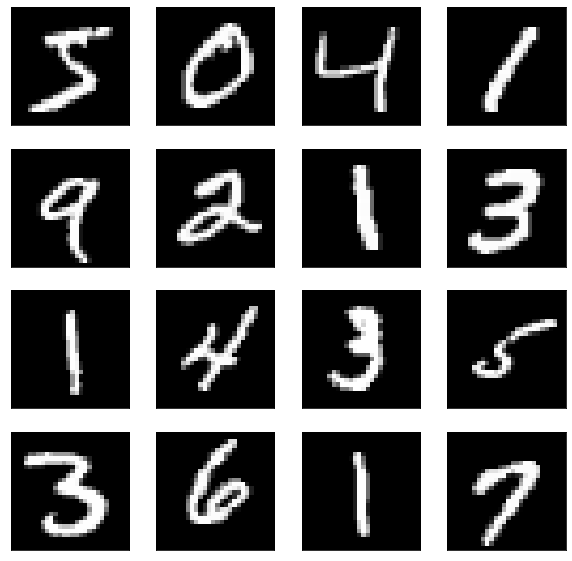

In [237]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], aspect=1, cmap='gray')
plt.show()

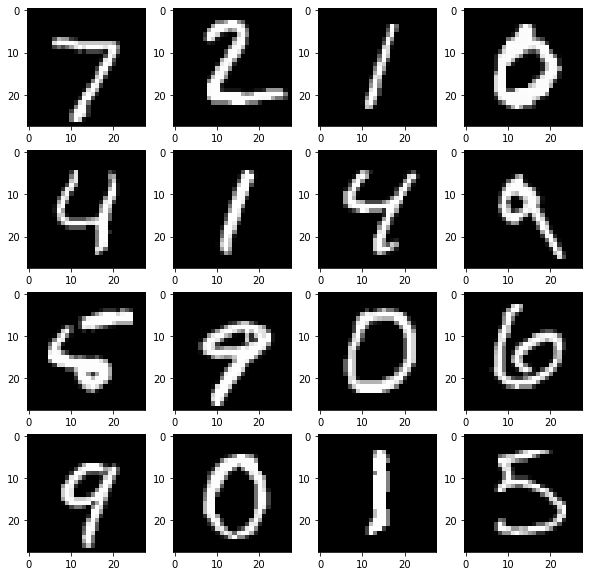

In [241]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i], aspect=1, cmap='gray')
plt.show()

Now let us set up a TF model and train the data.

In [224]:
# set up TF model and train 


# callback 
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    print(logs)
    if(logs.get('accuracy') > 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
                            
callbacks = myCallback()

# normalise 
x_train, x_test = x_train/255.0, x_test/255.0

# create model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

# fit model
history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

# stats 
print(history.epoch, history.history['accuracy'][-1])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1998 - accuracy: 0.9403
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0802 - accuracy: 0.9757
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0521 - accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/ste

Now let's try a prediction. We are expecting a *6*.

In [225]:
res = model.predict(x_test[11:12])
print(res)

[[1.1862162e-05 6.5783878e-11 2.2746306e-08 4.1486127e-11 7.9141891e-08
  2.5179140e-06 9.9998331e-01 2.3085963e-08 2.3028483e-06 7.9798429e-10]]


You can see that it does a correct prediction as element 6 has the highets value. Now let's add a **softmax** layer at the output.

In [226]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
res = probability_model.predict(x_test[11:12])
index = np.argmax(res)
print(res)
print(index)

[[0.08533797 0.08533695 0.08533695 0.08533695 0.08533696 0.08533717
  0.231966   0.08533695 0.08533715 0.08533695]]
6


As you can see above, this is a more convenient way of getting the prediction.

Now let's load our own images and try some predictions. Here are the images we generated using GIMP. They are 28x28 grayscale images. 

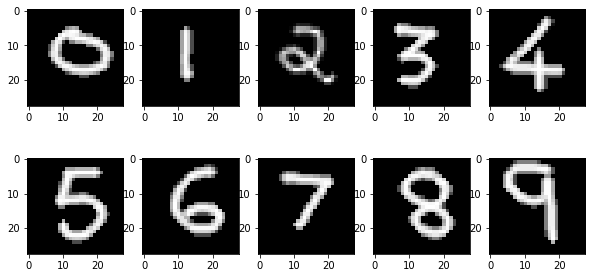

In [249]:
# display the digit images we created 
img_names = ['0.png', '1.png','2.png','3.png','4.png','5.png','6.png','7.png','8.png','9.png']
imgs = [np.array(Image.open(img_name)) for img_name in img_names]

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(imgs[i], aspect=1, cmap='gray')
plt.show()

Now let's try to predict.

In [229]:
def predict():
    img_data = np.array(imgs)
    res = probability_model.predict(img_data)
    print([np.argmax(a) for a in res])
predict()

[9, 8, 2, 3, 2, 5, 6, 7, 8, 3]


So we got 6 out 10 digits correct. 

Let's see if we can improve this by creating a better model.

In [251]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model2.summary())

# fit model
history2 = model2.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

# stats 
print(history.epoch, history.history['accuracy'][-1])

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               2769408   
_________________________________________________________________
dense_31 (Dense)             (None, 10)                5130      
Total params: 2,774,858
Trainable params: 2,774,858
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 77s 41ms/step - loss: 1.1129 - accuracy: 0.9439


(1, 28, 28, 1)
[[1.0241095e-29 1.2546178e-35 6.7552904e-19 3.6329287e-30 3.6560556e-34
  2.7730354e-24 4.9932238e-38 1.0000000e+00 4.0850524e-28 1.6101046e-23]]
[7]


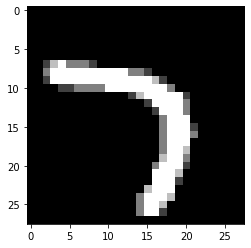

In [254]:
img_input = x_test[60:61]
print(img_input.shape)
res = model2.predict(img_input)
print(res)
print([np.argmax(a) for a in res])
plt.imshow(img_input.reshape(28, 28), aspect=1, cmap='gray')

(10, 28, 28, 1)
[[9.3653106e-12 2.1411968e-09 1.0929386e-13 1.7250438e-06 1.4610498e-13
  9.9999797e-01 4.7057622e-08 4.9319442e-12 7.8055727e-08 2.5157365e-07]]
[5]


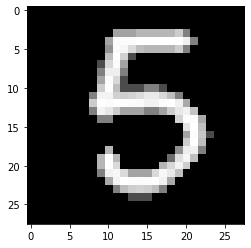

In [265]:
img_data = img_data.reshape(img_data.shape[0], 28, 28, 1)
img_input = img_data[5]
print(img_data.shape)
res = model2.predict(img_input.reshape(1, 28, 28, 1))
print(res)
print([np.argmax(a) for a in res])
plt.imshow(img_input.reshape(28, 28), aspect=1, cmap='gray')